1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Deep Learning is a subfield of machine learning using multi-layered neural networks. It evolved from perceptrons and shallow models to deep architectures due to advancements in computing power and big data. Unlike traditional ML that relies on manual feature engineering, deep learning automatically extracts hierarchical features.
***

2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

A perceptron has input nodes, weights, bias, an activation function, and output. It computes a weighted sum of inputs and passes through activation. Limitations: can only solve linearly separable problems, cannot handle XOR problems.
***

3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

 Activation functions introduce non-linearity. Sigmoid: outputs 0–1, suffers vanishing gradients. Tanh: outputs -1 to 1, still vanishes but centered. ReLU: outputs 0 or positive values, avoids vanishing gradients, widely used.
 ***

 4. What is the difference between Loss function and Cost function in neural networks? Provide examples.

  Loss function: error for a single training example (e.g., cross-entropy loss). Cost function: average loss across the dataset (e.g., mean squared error across all samples).
  ***

  5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
  
  Optimizers update weights to minimize loss. Gradient Descent: updates in small steps, may be slow. Adam: adaptive learning rates, efficient, widely used. RMSprop: maintains learning rate per parameter, good for recurrent nets.
  ***

 6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

In [ ]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

w = np.zeros(2)
b = 0
lr = 0.1

for _ in range(20):
    for i in range(4):
        z = np.dot(X[i], w) + b
        pred = 1 if z > 0 else 0
        error = y[i] - pred
        w += lr * error * X[i]
        b += lr * error
print(w, b)

[0.2 0.1] -0.2


  7. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

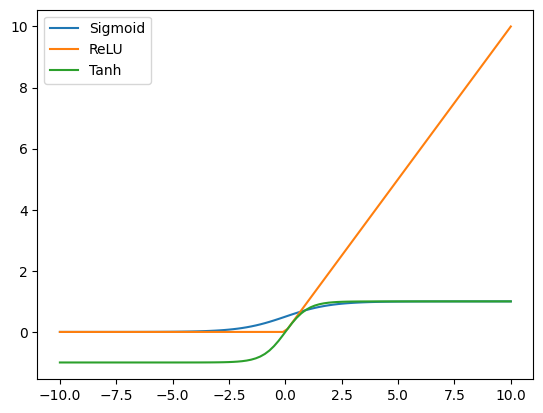

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, relu, label='ReLU')
plt.plot(x, tanh, label='Tanh')
plt.legend(); plt.show()


  8. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
print(history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8771 - loss: 0.4374 - val_accuracy: 0.9564 - val_loss: 0.1446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9657 - loss: 0.1178 - val_accuracy: 0.9700 - val_loss: 0.1014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0771 - val_accuracy: 0.9747 - val_loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9834 - loss: 0.0554 - val_accuracy: 0.9768 - val_loss: 0.0743
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9871 - loss: 0.0438 - val_accuracy: 0.9783 - val_loss: 0.0714
0.9871333241462708


	9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9788 - val_loss: 0.0739
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9791 - val_loss: 0.0761
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9789 - val_loss: 0.0776
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9799 - val_loss: 0.0750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9957 - loss: 0.0156 - val_accuracy: 0.9785 - val_loss: 0.0784


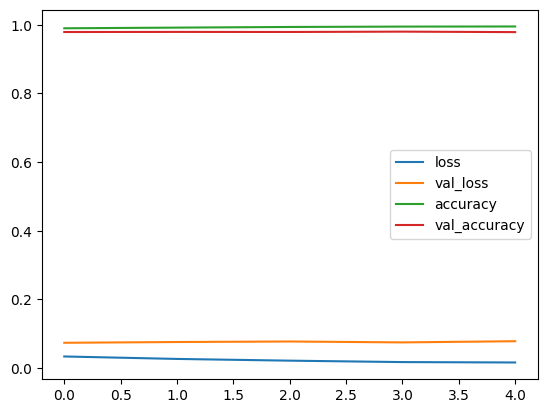

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(); plt.show()

# Interpretation: If training loss decreases but validation loss increases, model is overfitting.


	10. Fraud detection project workflow.

In [ ]:
#Model: multilayer NN with dense layers.
#Activation: ReLU in hidden, Sigmoid in output.
#Loss: Binary Crossentropy.
#Training: use class weights or SMOTE for imbalance.
#Optimizer: Adam.
#Overfitting prevention: dropout, early stopping, regularization.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])